In [25]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from itertools import chain
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
yes_path = 'with_mask'
img = os.listdir(yes_path)

In [3]:
img[:5]

['with_mask_1.jpg',
 'with_mask_10.jpg',
 'with_mask_100.jpg',
 'with_mask_1000.jpg',
 'with_mask_1001.jpg']

In [4]:
mask_img_data = []
for i in img:
    img_arr = cv2.imread(os.path.join(yes_path,i))
    
    mask_img_data.append(img_arr)

In [5]:
no_path = 'without_mask'
img_nomask = os.listdir(no_path)
no_mask_img_data = []
for i in img_nomask:
    img_arr = cv2.imread(os.path.join(no_path,i))
    
    no_mask_img_data.append(img_arr)

In [6]:
print("Number of images with mask",len(mask_img_data))
print("Number of images with no mask",len(no_mask_img_data))

Number of images with mask 3725
Number of images with no mask 3828


## Visualizing the images

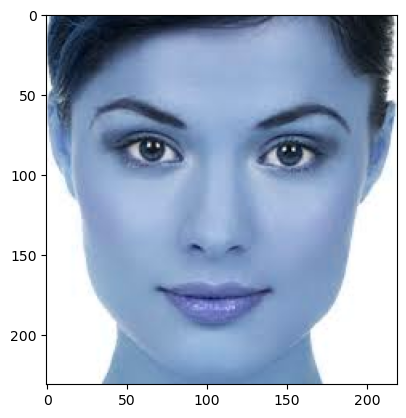

In [7]:
plt.imshow(no_mask_img_data[7])

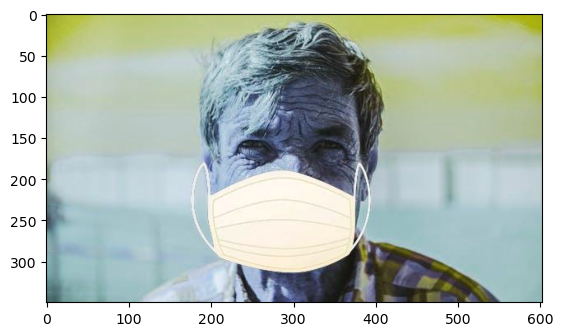

In [8]:
plt.imshow(mask_img_data[9])

In [9]:
mask_img_data[12].shape

(242, 159, 3)

## Labeling

In [10]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
labels = with_mask_labels + without_mask_labels

## Resizing the images

In [11]:
data = []
for i in img:
    image = Image.open(os.path.join(yes_path,i))
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for i in img_nomask:
    image = Image.open(os.path.join(no_path,i))
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

C:\Users\HP\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Visualizing after resizing

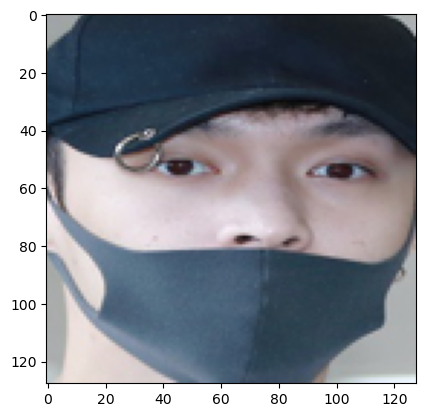

In [12]:
plt.imshow(data[23])

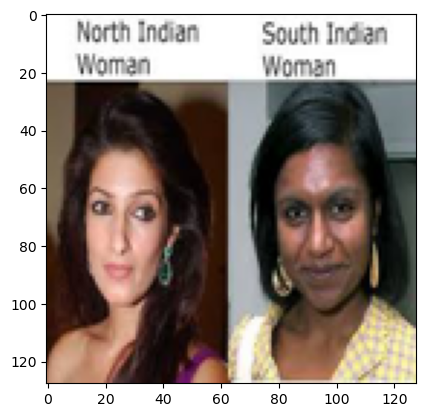

In [13]:
plt.imshow(data[4423])

In [14]:
data[7].shape

(128, 128, 3)

## Converting images, labels to arrays

In [15]:
X = np.array(data)
Y = np.array(labels)

In [16]:
X[:3]

array([[[[ 50,  58,  31],
         [ 46,  54,  34],
         [ 56,  59,  42],
         ...,
         [ 26,  32,  25],
         [ 29,  33,  18],
         [ 34,  40,  16]],

        [[ 47,  55,  30],
         [ 49,  57,  37],
         [ 59,  63,  40],
         ...,
         [ 18,  21,  11],
         [ 38,  42,  31],
         [ 31,  41,  22]],

        [[ 52,  58,  37],
         [ 50,  59,  38],
         [ 59,  64,  36],
         ...,
         [ 45,  44,  30],
         [ 29,  35,  28],
         [ 20,  30,  17]],

        ...,

        [[ 63,  72,  37],
         [ 66,  76,  41],
         [ 74,  84,  50],
         ...,
         [  5,   4,   0],
         [ 20,  19,  15],
         [ 17,  17,  12]],

        [[ 59,  71,  34],
         [ 60,  70,  39],
         [ 68,  76,  50],
         ...,
         [ 16,  15,  12],
         [ 15,  13,  10],
         [ 13,   9,   7]],

        [[ 53,  69,  29],
         [ 54,  64,  37],
         [ 57,  63,  43],
         ...,
         [ 18,  18,  16],
        

In [17]:
Y[:3]

array([1, 1, 1])

In [18]:
X.shape

(7553, 128, 128, 3)

## Spliting the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


## Normalizing the data

In [20]:
# Normalize pixel values to the range [0, 1]
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0


# Print the shapes of normalized datasets
print('Normalized Training Data Shape:', X_train_normalized.shape)
print('Normalized Testing Data Shape:', X_test_normalized.shape)


Normalized Training Data Shape: (6042, 128, 128, 3)
Normalized Testing Data Shape: (1511, 128, 128, 3)


### MODELING

In [26]:
img_height, img_width = 128, 128
batch_size = 25

# Build CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 128)      

### Train the model

In [27]:
# Train the model
model.fit(
    X_train_normalized,
    y_train,
    epochs=10,
    validation_split=0.15
)


Epoch 1/10
161/161 [==============================] - 86s 521ms/step - loss: 0.4591 - accuracy: 0.8043 - val_loss: 0.2693 - val_accuracy: 0.8986
Epoch 2/10
161/161 [==============================] - 83s 517ms/step - loss: 0.2654 - accuracy: 0.8921 - val_loss: 0.2134 - val_accuracy: 0.9228
Epoch 3/10
161/161 [==============================] - 87s 542ms/step - loss: 0.2201 - accuracy: 0.9126 - val_loss: 0.2217 - val_accuracy: 0.9107
Epoch 4/10
161/161 [==============================] - 83s 514ms/step - loss: 0.1789 - accuracy: 0.9276 - val_loss: 0.2224 - val_accuracy: 0.9250
Epoch 5/10
161/161 [==============================] - 87s 539ms/step - loss: 0.1412 - accuracy: 0.9466 - val_loss: 0.2139 - val_accuracy: 0.9261
Epoch 6/10
161/161 [==============================] - 87s 540ms/step - loss: 0.1148 - accuracy: 0.9558 - val_loss: 0.2020 - val_accuracy: 0.9327
Epoch 7/10
161/161 [==============================] - 84s 522ms/step - loss: 0.0825 - accuracy: 0.9686 - val_loss: 0.1849 - val_ac

### PREDICTIONS

In [29]:
predictions = model.predict(X_test_normalized)

48/48 [==============================] - 7s 145ms/step


In [30]:
predictions.tolist()


[[1.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],


In [31]:
rounded_predictions = (predictions > 0.5).astype(int)

In [32]:
#rounded_predictions = rounded_predictions.tolist()

In [33]:
rounded_predictions[:10]

[[1], [0], [1], [0], [1], [0], [0], [1], [0], [1]]

In [34]:
y_test

array([1, 0, 1, ..., 1, 0, 0])

In [35]:

pred = list(chain.from_iterable(rounded_predictions))

In [36]:
print(pred[:10])

[1, 0, 1, 0, 1, 0, 0, 1, 0, 1]


In [37]:

accuracy = accuracy_score(y_test,pred)

In [38]:
accuracy

0.9344804765056254

In [40]:
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[692  76]
 [ 23 720]]


### passing a unkown image to the model

In [41]:
with_mask = "mask.jpg"
without_mask = "nomask.jpg"

1/1 [==============================] - 0s 174ms/step
The person in the image is wearing a mask


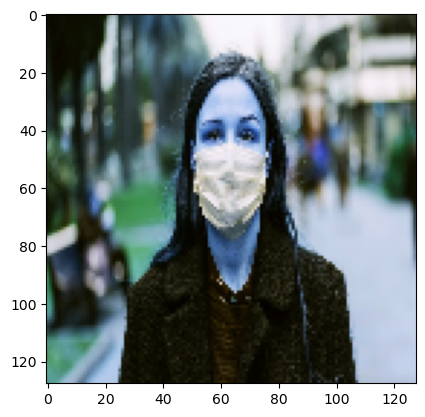

In [42]:
image = cv2.imread(with_mask)

# Preprocess the image
image = cv2.resize(image, (128,128))  # Resize to your model's input size
plt.imshow(image)
image = image / 255.0  # Normalize pixel values

# Make predictions
image = np.expand_dims(image, axis=0)  # Add batch dimension
prediction = model.predict(image)

# Postprocess the predictions (assuming binary classification)
threshold = 0.5
binary_prediction = (prediction > threshold).astype(int)

if binary_prediction[0]==1:
    print("The person in the image is wearing a mask")
else:
    print("The person in the image is not wearing a mask")

1/1 [==============================] - 0s 63ms/step
The person in the image is not wearing a mask


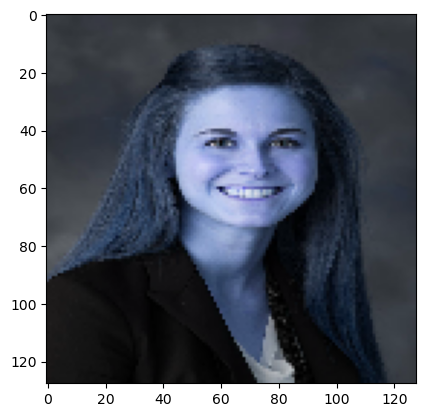

In [43]:
image = cv2.imread(without_mask)

# Preprocess the image
image = cv2.resize(image, (128,128))  # Resize  model's input size
plt.imshow(image)
image = image / 255.0  # Normalize pixel values

# Make predictions
image = np.expand_dims(image, axis=0)  # Add batch dimension
prediction = model.predict(image)


threshold = 0.5
binary_prediction = (prediction > threshold).astype(int)

if binary_prediction[0]==1:
    print("The person in the image is wearing a mask")
else:
    print("The person in the image is not wearing a mask")